In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
from osmnx.simplification import simplify_graph
from utils import assign_edge_colors
import networkx as nx
from matplotlib.lines import Line2D


In [2]:
lat1, lon1 = 35.71643109802673, 51.34974663404765
lat2, lon2 = 35.712445786680625, 51.35525105737604

graph = ox.graph_from_bbox((lon1, lat2, lon2, lat1), simplify=False, network_type="drive")
simplified_graph = simplify_graph(graph)

In [3]:
# Color Settings
BG_COLOR = (0,0,0)
NODE_COLOR = "w"
EDGE_COLORS = ["g", "b", "r","c"]

# Size
NODE_SIZE= 15
EDGE_LW = 3
 


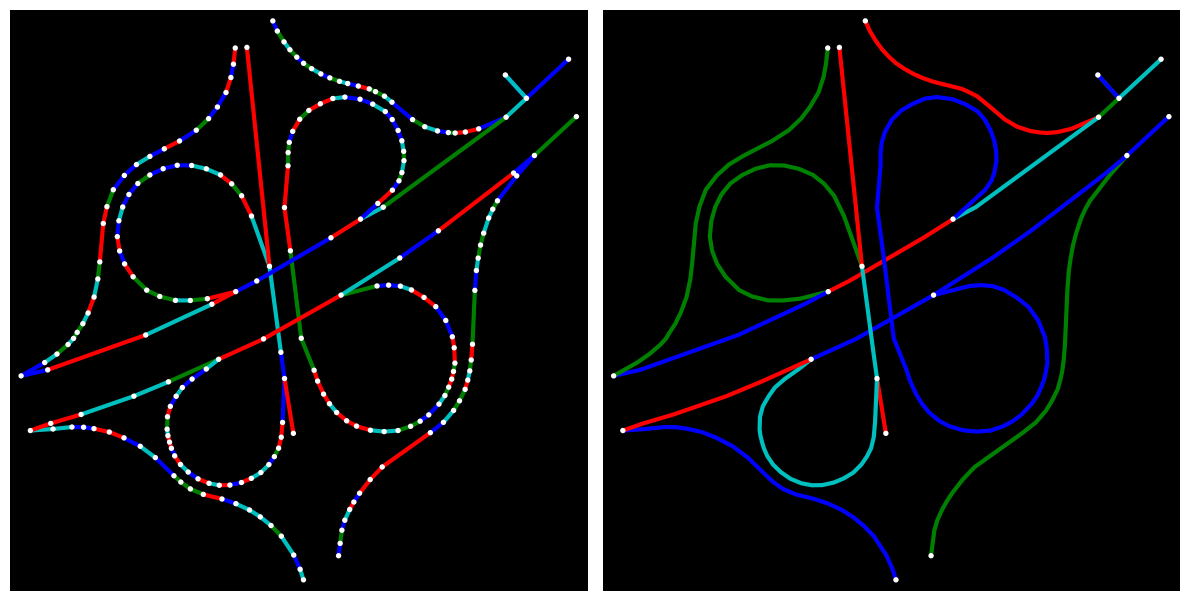

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7), frameon=False)

for ax in axes:
    ax.set_facecolor(BG_COLOR)

graph_edge_colors = assign_edge_colors(graph, EDGE_COLORS)
simplified_graph_edge_colors = assign_edge_colors(simplified_graph, EDGE_COLORS)

fig, axes[0] = ox.plot_graph(graph, ax=axes[0], edge_color=graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False) 
fig, axes[1] = ox.plot_graph(simplified_graph, ax=axes[1], edge_color=simplified_graph_edge_colors, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False)

# axes[0].set_title("Raw OSM graph (Before Simplification)")
# axes[1].set_title("After Simplification")
plt.tight_layout()
plt.savefig("outputs//before_after.png", dpi=300)
plt.show() 

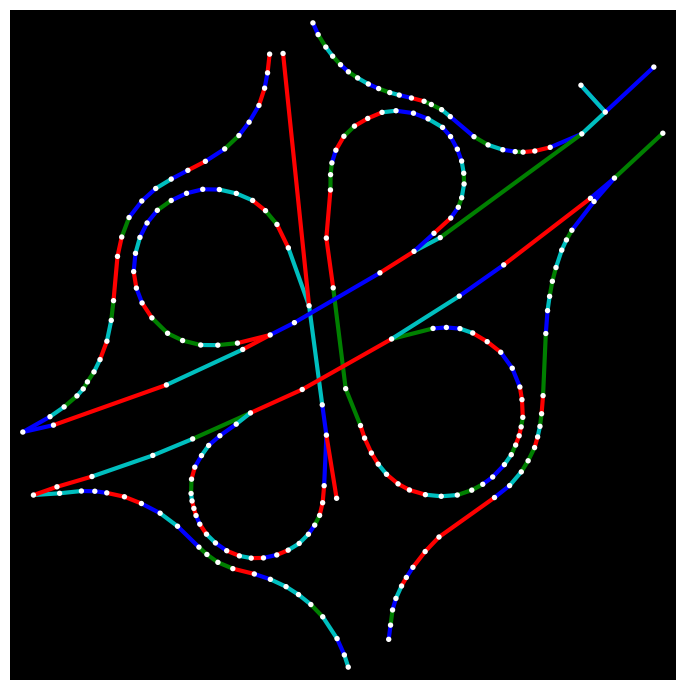

In [5]:
fig, ax = plt.subplots(figsize=(10,7), frameon=False)
ax.set_facecolor(BG_COLOR)
ox.plot_graph(graph, edge_color=graph_edge_colors, ax=ax, node_color=NODE_COLOR, node_size=NODE_SIZE, edge_linewidth=EDGE_LW, close=False, show=False) 
plt.tight_layout()
plt.savefig("outputs//before.png", dpi=300)

In [6]:
from osmnx.simplification import _is_endpoint

endpoints = {n for n in graph.nodes if _is_endpoint(graph, n, None, None)}


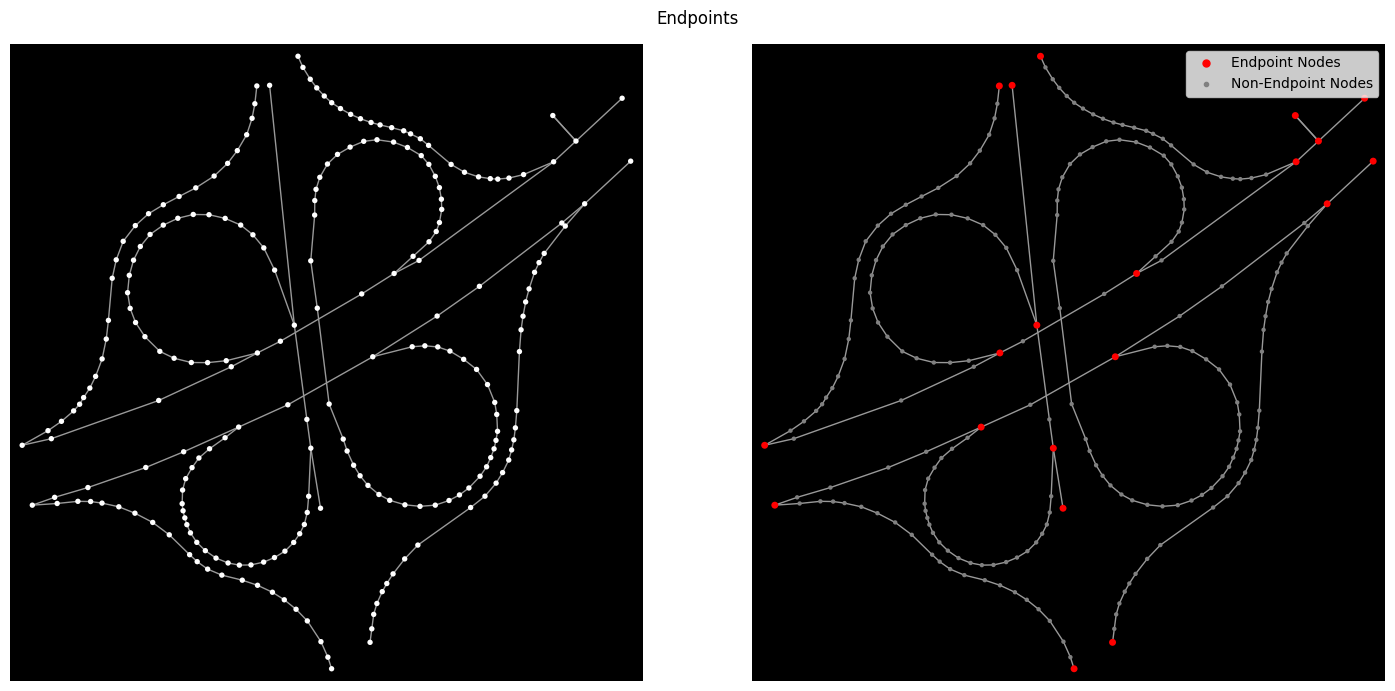

In [7]:
fig, axes = plt.subplots(figsize=(15,7), frameon=False, ncols=2)

for ax in axes:
    ax.set_facecolor(BG_COLOR)

node_size = [25 if node in endpoints  else 10 for node in graph.nodes()]
node_color = ["red" if node in endpoints  else "grey" for node in graph.nodes()]



fig, axes[1] = ox.plot_graph(graph, ax=axes[1], show=False, close=False, node_size=node_size, node_color=node_color)
fig, axes[0] = ox.plot_graph(graph, ax=axes[0], show=False, close=False)

legned_elements = [
    Line2D([0],[0], marker="o", markerfacecolor="red", ls=" ", color="red", label="Endpoint Nodes", markersize=5),
    Line2D([0],[0], marker="o", markerfacecolor="grey", ls=" ", color="grey", label="Non-Endpoint Nodes", markersize=3)
]
axes[1].legend(handles=legned_elements)

fig.suptitle("Endpoints")
fig.tight_layout()
plt.savefig("outputs//endpoints.png", dpi=300)
plt.show()


In [8]:
from osmnx.simplification import _build_path, _get_paths_to_simplify


for index, path in enumerate(_get_paths_to_simplify(graph, None, None)):
    fig, ax = plt.subplots(figsize=(10,7), frameon=False)
    ax.set_facecolor(BG_COLOR)
    fig, ax = ox.plot_graph(graph, show=False, close=False, node_color=node_color, node_size=node_size, ax=ax)
    fig, ax = ox.plot_graph_route(graph, path, route_color="yellow", route_linewidth=5, ax=ax, show=False, close=False)
    fig.savefig(f"outputs//path_gif//{index}.png")
    plt.close(fig)

In [ ]:
import imageio.v3 as iio
import os

def create_gif(path_gif, output_filename, duration=0.01):
    """
    Creates a looped GIF from PNG images in a folder.

    Args:
        path_gif: Path to the folder containing PNG images.
        output_filename: Name of the output GIF file.
        duration: Duration of each frame in seconds.
    """
    images = []
    filenames = sorted([f for f in os.listdir(path_gif) if f.endswith('.png')])
    for filename in filenames:
        filepath = os.path.join(path_gif, filename)
        images.append(iio.imread(filepath))

    output_path = os.path.join(path_gif, output_filename)
    iio.imwrite(output_path, images, fps=2, loop=0)

# Example usage:
path_gif = "outputs/path_gif"
output_filename = "animation.gif"
create_gif(path_gif, output_filename)
